In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading data into dataframe.
als_df = pd.read_csv(r'Data/als_data.csv')

# Viewing the dataframe.
als_df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


### 1. Remove any data that is not relevant ot the patient's ALS condition.

In [9]:
# Removing irrelevant ID & subject id columns.
als_df = als_df.drop(['ID', 'SubjectID'], axis=1)

### 2. Apply a standard scaler to the data.

In [10]:
# Creating standard scaler object.
standardizer = StandardScaler()

# Applying Standard scaler to the data.
als_df_ss = standardizer.fit_transform(als_df)

### 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [104]:
# Creating an empty dataframe for number of clusters vs silhouette score.
sil_score_df = pd.DataFrame(columns=['Clusters', 'Silhouette Score'])

In [105]:
# Calculating silhouette score for n clusters and adding to dataframe.
for k in range(2, 16):
    kmeans_model = KMeans(n_clusters=k, random_state=5).fit(als_df_ss)
    labels = kmeans_model.labels_
    sil_score = silhouette_score(als_df_ss, labels, metric='euclidean')
    sil_score_df = sil_score_df.append({'Clusters' : k, 'Silhouette Score' : sil_score}, ignore_index=True)

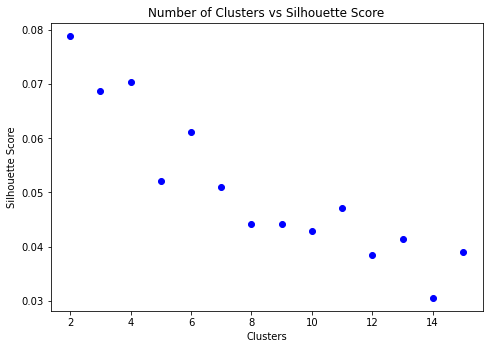

In [106]:
# Create a scatter plot of Clusters vs Silhouette Score
fig=plt.figure()
ax=fig.add_axes([0, 0, 1, 1])
ax.scatter(sil_score_df['Clusters'], sil_score_df['Silhouette Score'], color='b')
ax.set_xlabel('Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('Number of Clusters vs Silhouette Score')
plt.show()

### 4. Use the plot created in (3) to choose an optimal number of clusters for K-means. Justify your choice.

From the above plot, we could see that the optimal number of clusters is 2 since it has the highest silhouette score.

### 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [108]:
# Fitting K-means model to the data with 2 clusters.
k_means_model = KMeans(n_clusters=2, random_state=5)
k_means_model.fit(als_df_ss)

KMeans(n_clusters=2, random_state=5)

### 6. Fit a PCA transformation with two features to the scaled data.

In [130]:
# Creating a pca with 2 components.
pca = PCA(n_components=2)

# Fitting the PCA.
als_pca = pca.fit_transform(als_df_ss)

# Creating a pca dataframe.
alspca_df = pd.DataFrame(data=als_pca, columns = ['PC_1', 'PC_2'])

# Obtaining the cluster labels.
label = k_means_model.fit_predict(als_df_ss)

# Adding the cluster labels to the dataframe.
alspca_df['Cluster'] = label

### 7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.

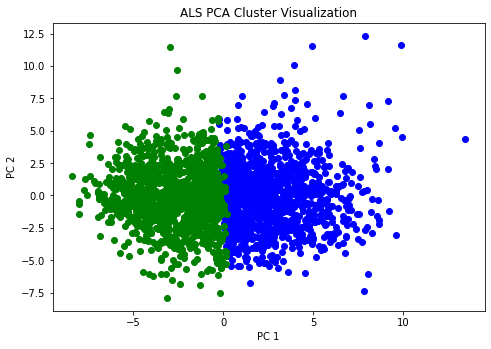

In [131]:
# Filtering out clusters.
alscluster_0 = alspca_df.loc[alspca_df['Cluster'] == 0]
alscluster_1 = alspca_df.loc[alspca_df['Cluster'] == 1]

# Creating a scatter plot of PCA transformed data.
fig=plt.figure()
ax=fig.add_axes([0, 0, 1, 1])

ax.scatter(alscluster_0['PC_1'], alscluster_0['PC_2'], color = 'blue')
ax.scatter(alscluster_1['PC_1'], alscluster_1['PC_2'], color = 'green')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

ax.set_title('ALS PCA Cluster Visualization')

plt.show()

### 8. Summarize your results and make a conclusion.

1) From the plot 3,based on silhouette score metric, we could say that clusters are dense and separated.

2) From the Kmeans and PCA model, the als data is divided into two sets of clusters. Right cluster contains more outliers compared to left.